## Import data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Read Data


In [2]:
customer_metainfo_df = pd.read_csv('./data/hw3_f_customer_metainfo.csv', index_col=0)
customer_metainfo_df.head()

,customer_id,credit_label,member_id,full_name,gender,date_of_birth,address,city,country,phone_number,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,50419,Good,50419,Võ Thành H***g,Nữ,1998-12-23,"1614/76/69/34/259, Đường Số 10, Phường Linh Tâ...",Đồng Nai,Việt Nam,001-840-870-5465x539,...,7665000,Kinh doanh online,Trên 3 tỷ,900000000,1100000000,Nhà ở chính,Có,43300000,555240000,13
1,458,Good,458,Mạc Hồng H**h,Nữ,2001-04-15,"760/45/196h, Đường Võ Văn C, Phường 6, Quận 11...",Hà Nội,Việt Nam,674-533-3993,...,9071000,Kinh doanh truyền thống,Trên 3 tỷ,615000000,400000000,Bất động sản thương mại,Có,31600000,289176000,14
2,20532,Good,20532,Sơn Thành L**h,Nữ,1995-12-25,"962/74/78/106, Cách Mạng Tháng Tám, Phường An ...",Bình Dương,Việt Nam,841-221-6697,...,7921000,Đầu tư,Dưới 300 triệu,646000000,300000000,Đất đai,Có,49800000,243228000,8
3,11655,Good,11655,Phú Lan B**h,Nam,1997-09-03,"551/71, Lý Tự Trọng, Phường Linh Trung, Quận 3...",Hồ Chí Minh,Việt Nam,7904248562,...,5771000,Kinh doanh truyền thống,Dưới 300 triệu,628000000,700000000,Căn hộ/Chung cư,Có,30300000,30948000,21
4,43585,Good,43585,Trần Thúy T***h,Nữ,1994-02-27,"253/224, Cô Bắc, Phường Bình Trưng Tây, Quận B...",Bắc Giang,Việt Nam,+1-375-668-3118x3238,...,1188000,Đầu tư,Trên 1 tỷ,278000000,1100000000,Bất động sản thương mại,Không,38800000,458592000,20


In [3]:
customer_metainfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        5000 non-null   int64  
 1   credit_label                       5000 non-null   object 
 2   member_id                          5000 non-null   int64  
 3   full_name                          5000 non-null   object 
 4   gender                             5000 non-null   object 
 5   date_of_birth                      5000 non-null   object 
 6   address                            5000 non-null   object 
 7   city                               5000 non-null   object 
 8   country                            5000 non-null   object 
 9   phone_number                       5000 non-null   object 
 10  email                              5000 non-null   object 
 11  occupation                         5000 non-null   object 
 1

### Meta feature Columns

Lấy cột label

In [4]:
label_df = customer_metainfo_df['credit_label']

loại bỏ những cột định danh khách hàng vì nó khiến model sẽ ghi nhớ hơn là học

In [5]:
feature_df_all = customer_metainfo_df.drop(columns=['customer_id','member_id','full_name','address','phone_number','email','date_of_birth','credit_label','gender','join_date','expiry_date','referral_code'])
feature_df = feature_df_all
feature_df.head()

,city,country,occupation,education,marital_status,membership_level,membership_status,customer_points,total_redeemed_points,discount_rate,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,Đồng Nai,Việt Nam,Kiến trúc sư,Sinh viên,Đã kết hôn,VIP,Active,614,200,0.10,...,7665000,Kinh doanh online,Trên 3 tỷ,900000000,1100000000,Nhà ở chính,Có,43300000,555240000,13
1,Hà Nội,Việt Nam,Designer,Đại học,Độc thân,VIP,Active,800,686,0.10,...,9071000,Kinh doanh truyền thống,Trên 3 tỷ,615000000,400000000,Bất động sản thương mại,Có,31600000,289176000,14
2,Bình Dương,Việt Nam,Diễn viên,Đi làm,Có gia đình,VIP,Active,673,619,0.10,...,7921000,Đầu tư,Dưới 300 triệu,646000000,300000000,Đất đai,Có,49800000,243228000,8
3,Hồ Chí Minh,Việt Nam,Lập trình viên,Sinh viên,Có gia đình,VIP,Active,652,567,0.05,...,5771000,Kinh doanh truyền thống,Dưới 300 triệu,628000000,700000000,Căn hộ/Chung cư,Có,30300000,30948000,21
4,Bắc Giang,Việt Nam,Bác sĩ,Đại học,Độc thân,VIP,Active,608,604,0.07,...,1188000,Đầu tư,Trên 1 tỷ,278000000,1100000000,Bất động sản thương mại,Không,38800000,458592000,20


In [6]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   city                               5000 non-null   object 
 1   country                            5000 non-null   object 
 2   occupation                         5000 non-null   object 
 3   education                          5000 non-null   object 
 4   marital_status                     5000 non-null   object 
 5   membership_level                   5000 non-null   object 
 6   membership_status                  5000 non-null   object 
 7   customer_points                    5000 non-null   int64  
 8   total_redeemed_points              5000 non-null   int64  
 9   discount_rate                      5000 non-null   float64
 10  age                                5000 non-null   int64  
 11  membership_lifespan                5000 non-null   int64  
 1

## 1. Feature Engineering

In [7]:
# hãy nhìn qua các columns ko phải là number 
feature_df.select_dtypes(include=[object, bool])

,city,country,occupation,education,marital_status,membership_level,membership_status,signup_in_latenight,top_rejected_reason,top_refunded_reason,top_payment_method,top_payment_channel,is_ordering_shipping_address_same,income_stability,income_source,annually_income_segment,top_property_type,in_debt
0,Đồng Nai,Việt Nam,Kiến trúc sư,Sinh viên,Đã kết hôn,VIP,Active,False,Sản phẩm không đáp ứng yêu cầu của khách hàng,Khách hàng không nhận được hàng,Thanh toán qua cổng thanh toán trực tuyến,Cửa hàng trực tiếp,False,Rất ổn định,Kinh doanh online,Trên 3 tỷ,Nhà ở chính,Có
1,Hà Nội,Việt Nam,Designer,Đại học,Độc thân,VIP,Active,True,Sản phẩm không đáp ứng yêu cầu của khách hàng,Sản phẩm gửi sai,Thanh toán bằng QR Code,Điểm thanh toán tự động,False,Rất ổn định,Kinh doanh truyền thống,Trên 3 tỷ,Bất động sản thương mại,Có
2,Bình Dương,Việt Nam,Diễn viên,Đi làm,Có gia đình,VIP,Active,False,Sản phẩm giao muộn so với hẹn giao,Vấn đề khác,Thanh toán qua cổng thanh toán trực tuyến,Cổng thanh toán của bên thứ ba,False,Ổn định,Đầu tư,Dưới 300 triệu,Đất đai,Có
3,Hồ Chí Minh,Việt Nam,Lập trình viên,Sinh viên,Có gia đình,VIP,Active,True,Sản phẩm giao muộn so với hẹn giao,Khách hàng không nhận được hàng,Thẻ tín dụng,Cửa hàng trực tiếp,True,Rất ổn định,Kinh doanh truyền thống,Dưới 300 triệu,Căn hộ/Chung cư,Có
4,Bắc Giang,Việt Nam,Bác sĩ,Đại học,Độc thân,VIP,Active,True,Sản phẩm không hoạt động đúng cách,"Khách hàng đổi ý, không muốn mua nữa",Thanh toán qua cổng thanh toán trực tuyến,Cổng thanh toán của bên thứ ba,False,Ổn định,Đầu tư,Trên 1 tỷ,Bất động sản thương mại,Không
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Bình Dương,Việt Nam,Kỹ sư phần mềm,Trung học phổ thông,Độc thân,VIP,Active,False,Vấn đề khác,Sản phẩm không đúng mô tả,Thanh toán qua cổng thanh toán trực tuyến,Giao diện thanh toán trực tuyến trên website,True,Ổn định,Cho thuê,Dưới 300 triệu,Nhà ở chính,Không
4996,Hà Nội,Việt Nam,Giáo viên,Tiến sĩ,Có gia đình,VIP,Expired,True,Sản phẩm không đáp ứng yêu cầu của khách hàng,Sản phẩm nhận không đủ số lượng,Tiền mặt khi nhận hàng (COD),Ứng dụng điện thoại di động,True,Tạm ổn,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,Bất động sản thương mại,Có
4997,Hà Tĩnh,Việt Nam,Lập trình viên,Đại học,Độc thân,VIP,Active,True,Sản phẩm giao muộn so với hẹn giao,Khách hàng không nhận được hàng,Thanh toán qua cổng thanh toán trực tuyến,Giao diện thanh toán trực tuyến trên website,False,Rất ổn định,Kinh doanh truyền thống,Trên 3 tỷ,Đất đai,Có
4998,Nam Định,Việt Nam,Kiến trúc sư,Đi làm,Độc thân,VIP,Active,True,Dịch vụ không chuyên nghiệp,Sản phẩm bị hỏng trong quá trình vận chuyển,Thẻ tín dụng,Cổng thanh toán của bên thứ ba,True,Rất ổn định,Đầu tư,Trên 3 tỷ,Đất đai,Có


In [8]:
# hãy nhìn qua các columns ko phải là number 
feature_df.select_dtypes(include=[object, bool]).nunique()

city                                 62
country                               1
occupation                           22
education                             7
marital_status                        7
membership_level                      2
membership_status                     2
signup_in_latenight                   2
top_rejected_reason                   7
top_refunded_reason                   8
top_payment_method                    5
top_payment_channel                   5
is_ordering_shipping_address_same     2
income_stability                      4
income_source                         6
annually_income_segment               4
top_property_type                     4
in_debt                               2
dtype: int64

chúng ta sử dụng one-hot encoder để để chuyển đổi sang dạng số

In [9]:
feature_df = pd.get_dummies(feature_df,columns=feature_df.select_dtypes(include=[object, bool]).columns)
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Columns: 189 entries, customer_points to in_debt_Không
dtypes: bool(152), float64(5), int64(32)
memory usage: 2.2 MB


In [10]:
# Xem qua các cột numeric
feature_df.select_dtypes(exclude=[object, bool])

,customer_points,total_redeemed_points,discount_rate,age,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,...,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_income,total_property_value,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,614,200,0.10,24,837,354,252,303,915,3,...,0.94,312,29,0.123289,7665000,900000000,1100000000,43300000,555240000,13
1,800,686,0.10,21,311,72,187,69,1000,3,...,0.46,926,10,0.325329,9071000,615000000,400000000,31600000,289176000,14
2,673,619,0.10,27,849,166,164,226,240,21,...,0.78,583,44,0.633699,7921000,646000000,300000000,49800000,243228000,8
3,652,567,0.05,25,821,37,32,273,630,6,...,0.51,985,43,0.068492,5771000,628000000,700000000,30300000,30948000,21
4,608,604,0.07,28,527,15,131,473,680,1,...,0.11,657,12,0.162109,1188000,278000000,1100000000,38800000,458592000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,725,561,0.05,17,291,234,269,139,116,1,...,0.99,42,31,0.777069,2687000,464000000,1600000000,35300000,40356000,14
4996,588,23,0.10,25,349,283,287,174,969,3,...,0.27,737,42,0.430812,8608000,921000000,700000000,43300000,519912000,24
4997,908,311,0.05,17,159,359,193,197,939,21,...,0.23,768,15,0.546895,5370000,769000000,900000000,15700000,499848000,22
4998,940,686,0.07,25,588,306,224,232,817,3,...,0.11,886,48,0.341516,9677000,571000000,600000000,35300000,49956000,17


### Setup data để đưa vào model

In [11]:
X = feature_df
y = label_df

In [12]:
# Kiểm tra lại dữ liệu
X

,customer_points,total_redeemed_points,discount_rate,age,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,...,annually_income_segment_Dưới 300 triệu,annually_income_segment_Trên 1 tỷ,annually_income_segment_Trên 3 tỷ,annually_income_segment_Từ 300 triệu tới 1 tỷ,top_property_type_Bất động sản thương mại,top_property_type_Căn hộ/Chung cư,top_property_type_Nhà ở chính,top_property_type_Đất đai,in_debt_Có,in_debt_Không
0,614,200,0.10,24,837,354,252,303,915,3,...,False,False,True,False,False,False,True,False,True,False
1,800,686,0.10,21,311,72,187,69,1000,3,...,False,False,True,False,True,False,False,False,True,False
2,673,619,0.10,27,849,166,164,226,240,21,...,True,False,False,False,False,False,False,True,True,False
3,652,567,0.05,25,821,37,32,273,630,6,...,True,False,False,False,False,True,False,False,True,False
4,608,604,0.07,28,527,15,131,473,680,1,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,725,561,0.05,17,291,234,269,139,116,1,...,True,False,False,False,False,False,True,False,False,True
4996,588,23,0.10,25,349,283,287,174,969,3,...,False,False,False,True,True,False,False,False,True,False
4997,908,311,0.05,17,159,359,193,197,939,21,...,False,False,True,False,False,False,False,True,True,False
4998,940,686,0.07,25,588,306,224,232,817,3,...,False,False,True,False,False,False,False,True,True,False


In [13]:
# kiểm tra label
y

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
4995    Good
4996    Good
4997    Good
4998    Good
4999    Good
Name: credit_label, Length: 5000, dtype: object

In [14]:
# đảm bảo đây chỉ có 2 label là good và bad
y.value_counts()

credit_label
Good    4769
Bad      231
Name: count, dtype: int64

<Axes: ylabel='count'>

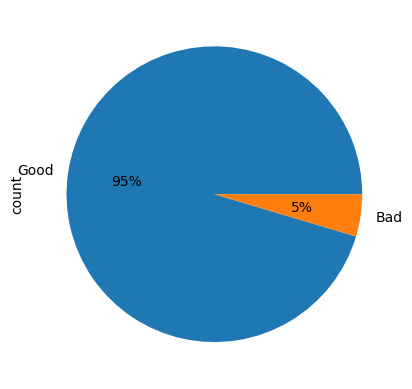

In [15]:
y.value_counts().plot(kind='pie', autopct='%1.0f%%')

## 2. Train/Test selection


Chúng ta chia train test để có thể kiểm tra lại độ chính xác của mô hình và dữ liệu lên một tập không có sẵn, xem có chênh lệch với tập test hay không

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## 3. Model Selection with GridSearchCV

### Decision Tree

In [17]:
decision_tree_model = DecisionTreeClassifier()
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

### Random Forest

In [18]:
random_forest_model = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

### GridSearchCV

In [19]:
GSV_dt = GridSearchCV(decision_tree_model,param_grid_dt,cv=5).fit(X_train,y_train)
GSV_rf = GridSearchCV(random_forest_model,param_grid_rf,cv=5).fit(X_train,y_train)

## 4. Evaluate Model

lấy ra mô hình có paramater tốt nhất của cả 2

In [20]:
best_rf_model = GSV_dt.best_estimator_
best_dt_model = GSV_rf.best_estimator_

dự đoán y

In [21]:
y_predict_random_forest = best_rf_model.predict(X_test)
y_predict_decision_tree = best_dt_model.predict(X_test)

Kết quả trên cho thấy khả năng dự đoán của cả 2 đều rất tốt

In [22]:
# Sử dụng sklearn để tính toán dùm precision and recall
from sklearn.metrics import precision_recall_fscore_support
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_decision_tree, average='binary', pos_label='Good')
print('Với positive label là Good, Decision Tree model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Decision Tree model đạt được
	Precision is 0.98
	Recall is 1.00
	F1 score is 0.99


In [23]:
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_random_forest, average='binary', pos_label='Good')
print('Với positive label là Good, Random Forest model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Random Forest model đạt được
	Precision is 0.99
	Recall is 0.98
	F1 score is 0.99


Kết quả rất tốt mà chúng ta có thể dừng lại

# B. Scoring

Bây giờ chúng ta sẽ thử nghiệm scoring với unseen data (giả sử là sample của Marketing)

In [47]:
unseen_metadata = pd.read_csv('./data/hw3_marketing_testset.csv', index_col=0)
unseen_label = unseen_metadata.pop('credit_label')
unseen_feat = unseen_metadata[feature_df_all.columns]
unseen_feat = pd.get_dummies(unseen_feat,columns=unseen_feat.select_dtypes(include=[object, bool]).columns)
unseen_feat = unseen_feat.drop( columns='membership_level_Standard')

Lúc này unseen-feat giống như X-test và unseen-label giống y-test ở trên của bạn 

In [45]:
# Trước hết chúng ta lấy kết quả của 2 model đã train ở phần trên
pred_unseen_decision_tree = best_dt_model.predict(unseen_feat)
pred_unseen_random_forest = best_rf_model.predict(unseen_feat)

In [48]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_decision_tree, average='binary', pos_label='Good')
print('Với positive label là Good, Decision Tree model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Decision Tree model đạt được
	Precision is 0.77
	Recall is 0.96
	F1 score is 0.86


In [49]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_random_forest, average='binary', pos_label='Good')
print('Với positive label là Good, Random Forest model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Random Forest model đạt được
	Precision is 0.86
	Recall is 0.28
	F1 score is 0.42


Rõ ràng kết quả cả 2 model đã khác so với testset ban đầu rất nhiều

Model bây giờ không còn giữ precision (tức KH good thực sự là good **an toàn là trên hết**) cao như ban đầu mà bắt đầu có sự đánh đổi giữa precision và recall(tức là **gom càng nhiều càng tốt**)

Lý do cũng là data ban đầu bạn nhận được để train model không đại diện cho data unseen này.